* CS6243, EE4463, EE5573
* Team 13 - Kosi Colette Atupulazi, Ellen Ojo, Rob Grau
* Feburary 17, 2025
* Homework 1

# Problem 0 - Setup, Preprocessing

In [1]:
# Problem 0 - Setup, Preprocessing
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist

# load X and Y data.  We don't need train and test for the homework, however, the load_data() function creates them so they are below.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
# First we vectorize the data by reshaping the data from 28x28 matricies into a row of 784 values.
two_dim_x_train = x_train.reshape(60000,784)
two_dim_x_test = x_test.reshape(10000,784)
# Set the datatype to float32
float_x_train = two_dim_x_train.astype('float32')
float_x_test = two_dim_x_test.astype('float32')

In [3]:
# Copy the data into a Pandas Dataframe to make it easier to handle.  We'll copy back to Numpy at the end.
dfx_train = pd.DataFrame(float_x_train)
dfx_test = pd.DataFrame(float_x_test)
# Add the 'y' or target value to the data.  In this case, it informs of us which digit we have.
dfx_train['y'] = y_train
dfx_test['y'] = y_test
# Create a new dataframe with just the 0, 1,9
dfx_reduce_test = dfx_test.loc[dfx_test.y.isin([0,1,9])]
dfx_reduce_train = dfx_train.loc[dfx_train.y.isin([0,1,9])]
# Combine the train and test data into one dataframe.
dfx_combine = pd.concat([dfx_reduce_train, dfx_reduce_test])

In [4]:
y_values = dfx_combine['y']
# Since we've filtered out the digits that we don't want, we don't need the 'y' column any longer.  We'll drop the column.
new_matrix = dfx_combine.drop(['y'], axis=1)
# The data is supposed to have each training image as a column vector so we should transpose the matrix
new_matrix_transposed = new_matrix.transpose()
# Finally, we want the X matrix to be in numpy.  This completes the preprocessing.
X = new_matrix_transposed.to_numpy()
# Also needed Y later
y_values_np = y_values.to_numpy()

In [5]:
# By displaying the matrix, you can see that the datatype was not changed and is still float32.
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# Problem 1 - Norms

In [6]:
# Problem 1 - Norms
# We want to filter data from matrix X further so we can calculate the centroid vector for each of the three digits.
zero_filter = np.where(y_values_np == 0)
one_filter = np.where(y_values_np == 1)
nine_filter = np.where(y_values_np == 9)

# Apply the filter to the columns
zero_X = X[:,zero_filter]
one_X = X[:,one_filter]
nine_X = X[:,nine_filter]

# Get the average of each centroid
zero_centroid = zero_X.mean(axis=2)
one_centroid = one_X.mean(axis=2)
nine_centroid = nine_X.mean(axis=2)

# Even though array is 784x1, still acts as if 2D, flattening to true 1D array, aka vector.
zerot = zero_centroid.transpose()
zero_centroid = zerot.flatten()
onet = one_centroid.transpose()
one_centroid = onet.flatten()
ninet = nine_centroid.transpose()
nine_centroid = ninet.flatten()

# Calculate Norms
zero_norm_L1 = np.linalg.norm(zero_centroid,1)
zero_norm_L2 = np.linalg.norm(zero_centroid,2)
zero_norm_L3 = np.linalg.norm(zero_centroid,3)
one_norm_L1 = np.linalg.norm(one_centroid,1)
one_norm_L2 = np.linalg.norm(one_centroid,2)
one_norm_L3 = np.linalg.norm(one_centroid,3)
nine_norm_L1 = np.linalg.norm(nine_centroid,1)
nine_norm_L2 = np.linalg.norm(nine_centroid,2)
nine_norm_L3 = np.linalg.norm(nine_centroid,3)

# Report Results
print("Zero Centroid, L1 norm: ",zero_norm_L1)
print("Zero Centroid, L2 norm: ",zero_norm_L2)
print("Zero Centroid, L3 norm: ",zero_norm_L3)
print("One Centroid, L1 norm: ",one_norm_L1)
print("One Centroid, L2 norm: ",one_norm_L2)
print("One Centroid, L3 norm: ",one_norm_L3)
print("Nine Centroid, L1 norm: ",nine_norm_L1)
print("Nine Centroid, L2 norm: ",nine_norm_L2)
print("Nine Centroid, L3 norm: ",nine_norm_L3)

Zero Centroid, L1 norm:  34635.086
Zero Centroid, L2 norm:  2109.5452
Zero Centroid, L3 norm:  865.52094
One Centroid, L1 norm:  15214.932
One Centroid, L2 norm:  1372.1681
One Centroid, L3 norm:  668.26666
Nine Centroid, L1 norm:  24585.777
Nine Centroid, L2 norm:  1683.1967
Nine Centroid, L3 norm:  733.47784


# Problem 2 - Singular Value Decomposition

In [7]:
# Problem 2 - Singular Value Decomposition
U, S, Vh = np.linalg.svd(X, full_matrices=True)

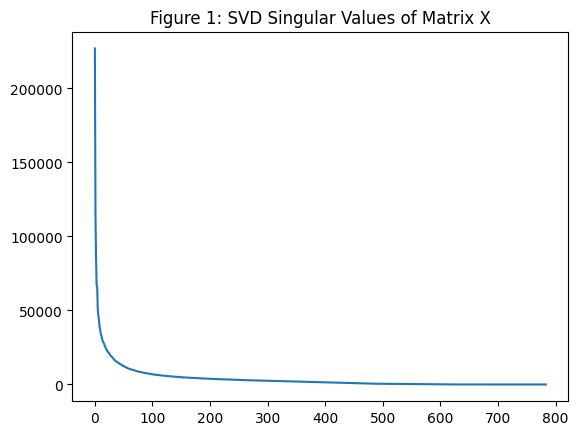

In [8]:
# Plot results of Singular Values, namely S from SVD decomposition.
# They are already arranged
import matplotlib.pyplot as plt
plt.title('Figure 1: SVD Singular Values of Matrix X')
plt.plot(S)
plt.show()

Discussion for Problem 2.

 The singular values represent each of the 28x28 grid of pixels that comprise each of the handwritten digit images. The profile shows how much each additional pixel contributes to our understanding of what each image is (namely a 0, 1, or 9).  You can see by the time it gets to 100 pixels, the slope of the curve is pretty flat. Just as a visual estimate, somewhere between 50-75 pixels, the inflection point of the curve exists and after that there isn't as much information be contrinbuted by including additional pixels.

# Problem 3. Low Rank Approximation

In [9]:
# Problem 3. Low Rank Approximation

# Construct set of K values
k_set = list(range(1,784,50))
k_set.append(784)

# Low Rank Appoximation calculations

# Create list to store error values
error_of_X_and_Y_k = []

# Iterate through all K, calculating low rank appoximations.  The k_low_rank intermediate product is Y_k.
# We then move on to calculating the Frob norm by first taking the difference of X and Y_k and then
# using the np.linalg.norm command.
for rank_k in k_set:
  k_low_rank = U[:, :rank_k] @ np.diag(S[:rank_k]) @ Vh[:rank_k, :]
  diff_array = X - k_low_rank
  diff_array_frob = np.linalg.norm(diff_array, ord='fro')
  error_of_X_and_Y_k.append(diff_array_frob)

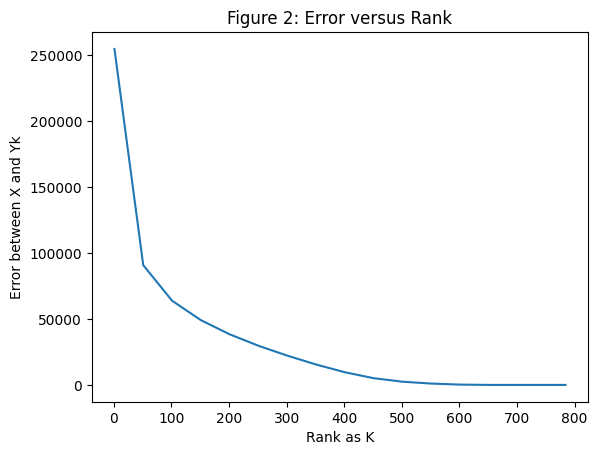

In [10]:
# Create a plot of the error versus K

plt.title('Figure 2: Error versus Rank')
plt.plot(k_set,error_of_X_and_Y_k)
plt.xlabel('Rank as K')
plt.ylabel('Error between X and Yk')
plt.show()

Discussion for Problem 3.

We see that as K increases, the error drops to near zero. This makes sense because as K increases, the low rank approximation becomes more and more similar to the original X and as that happens the differences between the two matricies also become smaller.

# Problem 4. Storage Efficiency

In [11]:
# Problem 4. Storage Efficiency

# Storage Elements in X is the vector size times the number of instances. It is also conveniently the rows times the columns of the matrix.
# The minimum Storage Elements in Y_k in the vector size times K.  K being the number of instances saved.  We do not need to store the zeros for instances that
# are larger than K.

# Elements in X
X_size = X.shape[0] * X.shape[1]

# Minimum Elements in K
K_size = []
for rank_k in k_set:
  K_size.append(rank_k * X.shape[1])

# Show the X_size so we know our maximum number of storage elements
X_size

17042592

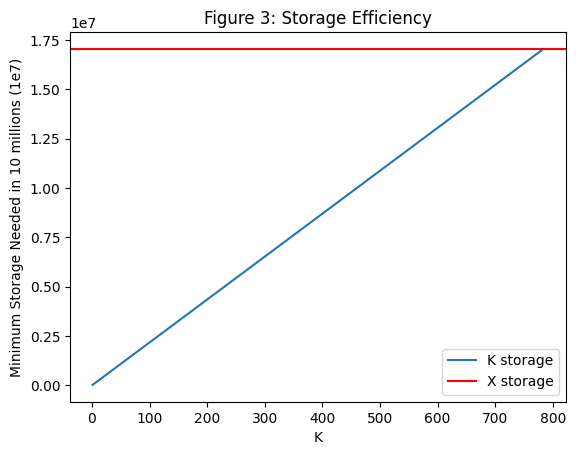

In [12]:
# Plot Storage Needs

plt.title('Figure 3: Storage Efficiency')
plt.plot(k_set,K_size)
plt.axhline(y=X_size, color='r', linestyle='-')
plt.xlabel('K')
plt.ylabel('Minimum Storage Needed in 10 millions (1e7)')
plt.legend(['K storage','X storage'])
plt.show()

Discussion for Problem 4.

There's more than 17 million elements needed for X.  A low rank approximation will need far less of the space for X.  If you look at the error curve in figure 2, you can see how the inflection point is somewhere between a k of 100 and 200.  After a K of 200, there isn't nearly as much error as there was for smaller K values.  At K=200, the storage on Figure 3 is about 25% of the storage needed for all of X. That's a considerable improvement over storing X in its entirety.

# Problem 5. Visualizing Low-Rank Projections

In [13]:
# Problem 5. Visualizing Low-Rank Projections

# The two most significant (aka dominant) vectors are the biggest vectors in V.  They are also the first two.  We can reach these vectors by reducing the SVD
# to two vectors.  We only need V, however, I'm reducing everything in case it is needed later.

reduction = 2

U_reduced = U[:, :reduction]
S_reduced = S[:reduction]
Sd_reduced = np.diag(S_reduced)
Vh_reduced = Vh[:reduction, :]

# Now we want to split it into the two vectors
Vh_split = np.vsplit(Vh_reduced,2)

# Now we need to project X onto our vectors
X_proj_Vh0 = X @ Vh_split[0].T
X_proj_Vh1 = X @ Vh_split[1].T

# Calculate Centroids
X_proj_Vh0_centroid = X_proj_Vh0.mean()
X_proj_Vh1_centroid = X_proj_Vh1.mean()

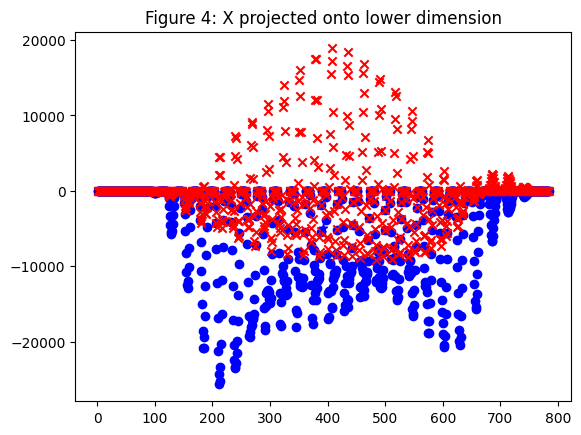

In [14]:
# Generate the plot

# We have 1D vectors and a scatter plot that takes 2D features.  Need to generate an x-series that is just the total inputs.
x_scatter_series = list(range(1,785,1))
# The list we just created didn't take the mean() function neatly so I just went with the aritmetic mean for centroid.
x_scatter_series_centroid = (392+393)/2
plt.scatter(x_scatter_series,X_proj_Vh0,color='blue',marker='o')
plt.scatter(x_scatter_series,X_proj_Vh1,color='red',marker='x')
plt.scatter(x_scatter_series_centroid,X_proj_Vh0_centroid, color='blue',marker='*')
plt.scatter(x_scatter_series_centroid,X_proj_Vh1_centroid, color='red',marker='*')
plt.title("Figure 4: X projected onto lower dimension")
plt.show()

Discussion Part 1 for Problem 5

We can observe that there are a lot of points around zero, suggesting that there are a lot of pixels in the images that don't have any information.  The data is close to zero at the high and low range which tells us that the edges of the images don't contain much information.  Please note, the images were vectorized, however we know that the highest and lowest numbers correspond to the first and last pixels, namely the edges.

Discussion Part 2 for Problem 5

Although classification is for supervised machine learning and clustering is for unsupervised machine learning, you could use clustering- namely grouping points around the centroid to create groupings which could be later classified.  Having two computational basis would assist in this process-  For example, An image could be placed into one group if it had a smaller deviation from the centroid of one computation basis over another.

# Problem 6. Noise

In [15]:
# Problem 6. Noise

# Create copy of array
X_noise = np.copy(X)

# Generate Noise.  5% is 2 out of 40. In one of those cases you get a zero, in the other 255.
from random import randint
for element in np.nditer(X_noise, op_flags=['readwrite']):
  thisnum = randint(1,40)
  if thisnum == 39:
    element[...] = 255
  elif thisnum == 40:
    element[...] = 0

In [16]:
# Perform SVD on X_noise. Matrix variables have an extra 'n' for noise
Un, Sn, Vhn = np.linalg.svd(X_noise, full_matrices=True)

In [17]:
# Low Rank Approximation on X_noise
# Create list to store error values
error_of_X_noise_and_Y_k = []

# Iterate through all K, calculating low rank appoximations.  The k_low_rank intermediate product is Y_k.
# We then move on to calculating the Frob norm by first taking the difference of X_noise and Y_k and then
# using the np.linalg.norm command.
for rank_k in k_set:
  k_low_rank = Un[:, :rank_k] @ np.diag(Sn[:rank_k]) @ Vhn[:rank_k, :]
  diff_array_two = X_noise - k_low_rank
  diff_array_two_frob = np.linalg.norm(diff_array_two, ord='fro')
  error_of_X_noise_and_Y_k.append(diff_array_two_frob)


Discussion Part 1 for Problem 6

The errors show how much data is lost between the original matrix and the low rank approximation. In the case of the original matrix, everything that is lost
 data from the handwriting images.  In the case of the noisy matrix, we should be getting rid of noise as well, particularly since we know the noise is random and not contributing to any of the particular handwritten digits.

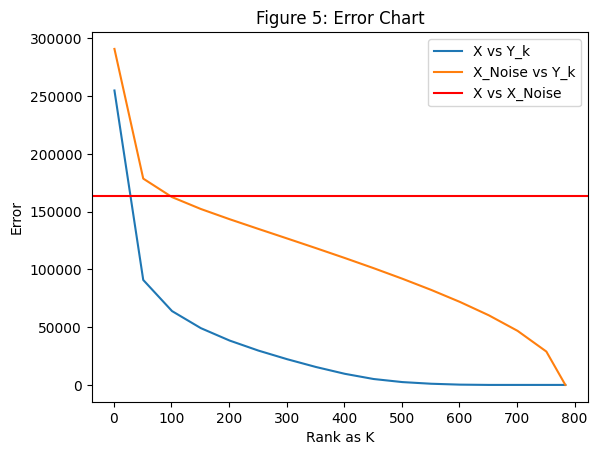

In [18]:
# Plot errors on graph

# We actually need the error between X and X_noise which we have not previously calculated.  We determine it below:
diff_array_three = X - X_noise
error_of_X_and_X_noise = np.linalg.norm(diff_array_three, ord='fro')

# Create a plot of the error versus K

plt.title('Figure 5: Error Chart')
plt.plot(k_set,error_of_X_and_Y_k)
plt.plot(k_set,error_of_X_noise_and_Y_k)
plt.axhline(y=error_of_X_and_X_noise, color='r', linestyle='-')
plt.xlabel('Rank as K')
plt.ylabel('Error')
plt.legend(['X vs Y_k','X_Noise vs Y_k','X vs X_Noise'])
plt.show()

Discussion Part 2 for Problem 6

Both curves decrease monotonically.  The rate each curve decreases may vary but they do not stop decreasing and thus meet the definition of monotonicity

Discussion Part 3 for Problem 6

The noise is not contributing in a significant way to the digits.  Therefore, when the SVD decomposition selects vectors, it is not (primarily) selecting noise. Thus as the low rank approximation focuses on the most significant parts of the matrix, the less important parts including noise are removed.

# Problem 7 - Solving Linear Equations

In [19]:
# Problem 7 - Solving Linear Equations

# Define Matrices

A = np.array([[-2.74125009, 2.24215689, -0.60553211, -0.16755625],[-0.34868395, 0.29538923, -0.45259498, 0.50015934],[2.49664208, 0.27798324, 2.00739274, 0.2197803]])
y_A = np.array([[0.61339829],[0.11012282],[-0.06426754]])
B = np.array([[-2.74125009, -0.34868395, 2.49664208],[2.24215689, 0.29538923, 0.27798324],[-0.60553211, -0.45259498, 2.00739274],[-0.16755625, 0.50015934, 0.2197803]])
y_B = np.array([[0.66761214],[0.35931116],[0.74289966],[0.02979187]])
y_B2 = np.array([[0.24982762],[-0.45768269],[0.22778277],[0.6341392]])
C = np.array([[0.31997336, 0.43316234, -0.33457014, -0.34017903],[1.12969075, 1.52931319, -1.18122581, -1.20102843],[0.2008776, 0.27193705, -0.21004138, -0.21356262]])
y_C = np.array([[0.1421664],[0.50192948],[0.08925132]])
y_C2 = np.array([[-1.01480112],[0.4115211],[-0.45229071]])
D = np.array([[0.07999334, 0.28242269, 0.0502194],[0.10829058, 0.3823283, 0.06798426],[-0.08364254, -0.29530645, -0.05251035],[-0.08504476, -0.30025711, -0.05339065]])
y_D = np.array([[0.41615372],[0.56336601],[-0.43513813],[-0.44243299]])
y_D2 = np.array([[0.47277025],[-0.64357627],[1.30059591],[1.426948]])

In [20]:
# Compute Size and Rank of Matrix G

case1size = A.size
case1rank = np.linalg.matrix_rank(A)
case2size = B.size
case2rank = np.linalg.matrix_rank(B)
case3size = B.size
case3rank = np.linalg.matrix_rank(B)
case4size = C.size
case4rank = np.linalg.matrix_rank(C)
case5size = C.size
case5rank = np.linalg.matrix_rank(C)
case6size = D.size
case6rank = np.linalg.matrix_rank(D)
case7size = D.size
case7rank = np.linalg.matrix_rank(D)
print("Case 1: G = A, Size: ",case1size," Rank: ",case1rank)
print("Case 2: G = B, Size: ",case2size," Rank: ",case2rank)
print("Case 3: G = B, Size: ",case3size," Rank: ",case3rank)
print("Case 4: G = C, Size: ",case4size," Rank: ",case4rank)
print("Case 5: G = C, Size: ",case5size," Rank: ",case5rank)
print("Case 6: G = D, Size: ",case6size," Rank: ",case6rank)
print("Case 7: G = D, Size: ",case7size," Rank: ",case7rank)

Case 1: G = A, Size:  12  Rank:  3
Case 2: G = B, Size:  12  Rank:  3
Case 3: G = B, Size:  12  Rank:  3
Case 4: G = C, Size:  12  Rank:  3
Case 5: G = C, Size:  12  Rank:  3
Case 6: G = D, Size:  12  Rank:  3
Case 7: G = D, Size:  12  Rank:  3


In [21]:
# We need to compute SVD for purposes of projection matrix and span.
# Rather than repeating computations for all 7 cases, will just do the SVD for each of the 4 matrices
# then will use in further calculations for each case.

U_A, S_A, Vt_A = np.linalg.svd(A, full_matrices=False)
U_B, S_B, Vt_B = np.linalg.svd(B, full_matrices=False)
U_C, S_C, Vt_C = np.linalg.svd(C, full_matrices=False)
U_D, S_D, Vt_D = np.linalg.svd(D, full_matrices=False)

# Next we work through rank and reduce U to non-zero singular values for each matrix.
rankA = np.sum(S_A > 1e-10)
rankB = np.sum(S_B > 1e-10)
rankC = np.sum(S_C > 1e-10)
rankD = np.sum(S_D > 1e-10)
U_A_reduced = U_A[:, :rankA]
U_B_reduced = U_B[:, :rankB]
U_C_reduced = U_C[:, :rankC]
U_D_reduced = U_D[:, :rankD]

# Finally, compute projection matrix for each matrix
ProjA = U_A_reduced @ U_A_reduced.T
ProjB = U_B_reduced @ U_B_reduced.T
ProjC = U_C_reduced @ U_C_reduced.T
ProjD = U_D_reduced @ U_D_reduced.T

In [22]:
# Now we can focus on each case to see if the given vector is in the span of the matrix

case1testvector = ProjA @ y_A
case2testvector = ProjB @ y_B
case3testvector = ProjB @ y_B2
case4testvector = ProjC @ y_C
case5testvector = ProjC @ y_C2
case6testvector = ProjD @ y_D
case7testvector = ProjD @ y_D2

case1spanresult = np.linalg.norm(y_A - case1testvector) < 1e-10
case2spanresult = np.linalg.norm(y_B - case2testvector) < 1e-10
case3spanresult = np.linalg.norm(y_B2 - case3testvector) < 1e-10
case4spanresult = np.linalg.norm(y_C - case4testvector) < 1e-10
case5spanresult = np.linalg.norm(y_C2 - case5testvector) < 1e-10
case6spanresult = np.linalg.norm(y_D - case6testvector) < 1e-10
case7spanresult = np.linalg.norm(y_D2 - case7testvector) < 1e-10

print("Case 1 Projection Matrix: \n",ProjA)
print("Case 1 Is y_A in span of A?: ",case1spanresult)
print("\nCase 2 Projection Matrix: \n",ProjB)
print("Case 2 Is y_B in span of B?: ",case2spanresult)
print("\nCase 3 Projection Matrix: \n",ProjB)
print("Case 3 Is y_B2 in span of B?: ",case3spanresult)
print("\nCase 4 Projection Matrix: \n",ProjC)
print("Case 4 Is y_C in span of C?: ",case4spanresult)
print("\nCase 5 Projection Matrix: \n",ProjC)
print("Case 5 Is y_C2 in span of C?: ",case5spanresult)
print("\nCase 6 Projection Matrix: \n",ProjD)
print("Case 6 Is y_D in span of D?: ",case6spanresult)
print("\nCase 7 Projection Matrix: \n",ProjD)
print("Case 7 Is y_D2 in span of D?: ",case7spanresult)

Case 1 Projection Matrix: 
 [[ 1.00000000e+00  3.48566731e-17 -1.77839740e-16]
 [ 3.48566731e-17  1.00000000e+00  1.65047472e-16]
 [-1.77839740e-16  1.65047472e-16  1.00000000e+00]]
Case 1 Is y_A in span of A?:  True

Case 2 Projection Matrix: 
 [[ 0.75536382 -0.19929887  0.30720804  0.22514995]
 [-0.19929887  0.83763629  0.25027457  0.18342393]
 [ 0.30720804  0.25027457  0.61421576 -0.28273772]
 [ 0.22514995  0.18342393 -0.28273772  0.79278413]]
Case 2 Is y_B in span of B?:  False

Case 3 Projection Matrix: 
 [[ 0.75536382 -0.19929887  0.30720804  0.22514995]
 [-0.19929887  0.83763629  0.25027457  0.18342393]
 [ 0.30720804  0.25027457  0.61421576 -0.28273772]
 [ 0.22514995  0.18342393 -0.28273772  0.79278413]]
Case 3 Is y_B2 in span of B?:  False

Case 4 Projection Matrix: 
 [[ 1.00000000e+00 -3.28330509e-17  6.75527232e-18]
 [-3.28330509e-17  1.00000000e+00 -1.98719982e-17]
 [ 6.75527232e-18 -1.98719982e-17  1.00000000e+00]]
Case 4 Is y_C in span of C?:  True

Case 5 Projection Matri

Discussion Part 1 for Problem 7

Given our matrices are all either full row or full column rank, we can make the following conclusions:

*   Case 1: A is full row rank and therefore underdetermined
*   Case 2: B is full column rank and therefore overdetermined
*   Case 3: B is full column rank and therefore overdetermined
*   Case 4: C is full row rank and therefore underdetermined
*   Case 5: C is full row rank and therefore underdetermined
*   Case 6: D is full column rank and therefore overdetermined
*   Case 7: D is full column rank and therefore overdetermined



Discussion Part 2 for Problem 7

We need to review whether a given vector was in the span of the matrix so that we can ascertain whether a solution exists.  For cases 2, 3, 6, and 7 the vector
was not in the span of matrix and are therefore inconsistent and no solution exists for them.  For cases 1, 4, and 7 they were consisteant and because they are underdetermined an infinte number of solutions exist for them.

In [23]:
# Compute Solution if one exists

# As mentioned in the discussion, there is no solution for cases 2, 3, 6, and 7 so none will be calculated.
# There are infinite solutions for 1, 4, and 5 which are of the form x = A(dagger right)y + b.  We'll simply calculate A(dagger right)
# which is equal to A hermitian @ inverse of (A @ A hermitian).  Since we only have real numbers, hermitian is just the transpose.

# Case 1, Matrix A

A_transpose = A.T
A_A_transpose = A @ A_transpose
A_A_transpose_inverse = np.linalg.pinv(A_A_transpose)
A_dag_right = A_transpose @ A_A_transpose_inverse

print("Case 1, we can say y is 1 and b is zero for this result: \n",A_dag_right)

Case 1, we can say y is 1 and b is zero for this result: 
 [[-0.15325779  0.32016108  0.17899279]
 [ 0.29321061  0.33783661  0.28929374]
 [ 0.16437815 -0.60639144  0.21884222]
 [-0.13126429  1.4743142   0.15196067]]


In [24]:
# Cases 4 and 5, Matrix C

C_transpose = C.T
C_C_transpose = C @ C_transpose
C_C_transpose_inverse = np.linalg.pinv(C_C_transpose)
C_dag_right = C_transpose @ C_C_transpose_inverse

print("Cases 4 and 5, we can say y is 1 and b is zero for this result: \n",C_dag_right)

Cases 4 and 5, we can say y is 1 and b is zero for this result: 
 [[ 0.04459893  0.15745997  0.02799897]
 [ 0.06037557  0.21316064  0.03790347]
 [-0.04663347 -0.16464309 -0.02927625]
 [-0.04741526 -0.16740325 -0.02976705]]


# Reference List

We utilized course notes from Data Mining (UTSA CS5473), current course notes, the "Linear Algebra for ML - Lab" colab notebook, python/numpy man pages, and online reference material for Singular-Value Decomposition to create this report.